# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [1]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

/Users/justinfu/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Step 2: Read in your data set

In [2]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset?


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 observations.  2 missing values for gre, gpa.  1 missing val for prestige

#### Question 2. Create a summary table.

In [5]:
# function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a larger STD than GPA becaause it has larger values and a larger range (220 - 800) than GPA (2.26 - 4.00)

#### Question 4. Drop data points with missing data.


In [10]:
df_clean = df_raw.dropna()
#df_cleaned

#### Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: 
`df_clean.isnull().sum()` returns 0 for each column whereas `df_raw.isnull().sum()` returns non-zero values


In [31]:
#df_clean.isnull().sum()
#df_raw.isnull().sum()
#df_clean.count()  #non-null counts
#df_raw.count()  #non-null counts
(df_clean.gpa == np.nan).sum()
(df_clean.gre == np.nan).sum()

0

#### Question 6. Create box plots for GRE and GPA.

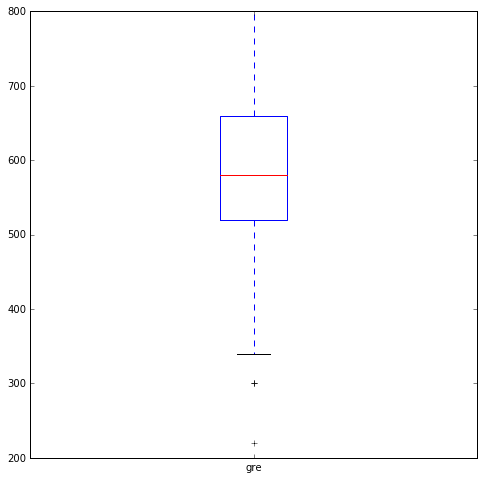

In [27]:
# boxplot 1 GRE
df_clean.gre.plot(kind = 'box', figsize = (8,8))

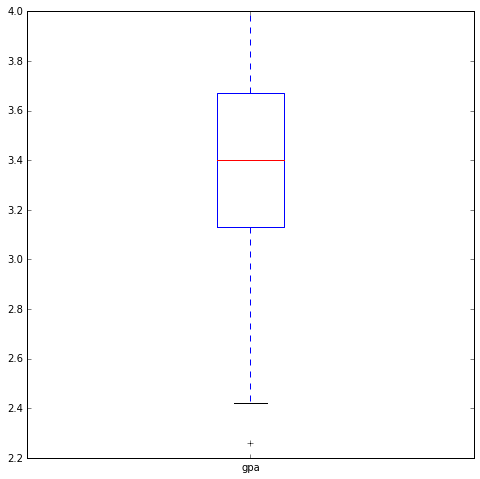

In [38]:
# boxplot 2 GPA
df_clean.gpa.plot(kind = 'box', figsize = (8,8))
#df_clean[ ['gpa', 'gre'] ].plot(kind = 'box', figsize = (8, 8))

#### Question 7. What do this plots show?

Answer:  These boxplots show the min, first quartile, median, third quartile and maximum values for GRE and GPA.

#### Question 8. Describe each distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dc41b50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e08c110>]], dtype=object)

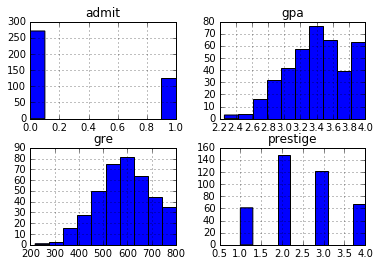

In [43]:
# plot the distribution of each variable
#for column in df_clean: df_clean[column].plot(kind='hist', figsize = (8,8))
#df_clean.plot(kind='hist', figsize = (8,8))
df_clean.hist()

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: No.  Admit is binary not normal.  GPA and GRE have heavy right tails.  Prestige is also a diescrete variable and skewed right.

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer: For exploratory analysis this is OK.  GPA and GRE are skewed right, and I'm going to try log transforming in the bonus section. Jeremiah also suggested transforming prestige.  

#### Question 11. Which of our variables are potentially colinear?

In [44]:
# create a correlation matrix for the data
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: admit is somewhat equivalently correlated with gre and gpa.   notably, gpa has a smaller range, so changes in that may be more impactful than changes in gre

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer:
Fetch the data, read any docs, clean up an NULL/NaN/illogical values, transform as needed for normal distributions; fit linear model with admit as the outcome var.  test different permutations/tranformations/colinearity of predictors.

#### Question 14. What is your hypothesis?

Answer: Admit is positively correlated with gre and gpa and negatively correlated with prestige.  I expect high gpa from a "more" prestigious school to have a higher imapct, too.  I separately would investigate normalizing GRE across different prestige schools.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.
try interpolating median/avg gre/gpa/prestiage for the missing values.  
look at the actual records, figure out if there's a reason/type/obvious human error

#### 2. Bonus: Log transform the skewed data.
for my own reference later: http://stackoverflow.com/questions/16968433/error-when-trying-to-apply-log-method-to-pandas-data-frame-column-in-python

#### 3. Advanced: Impute missing data.
for my own reference later: http://pandas.pydata.org/pandas-docs/stable/missing_data.html